# Pfizer Vaccine Tweets Data Exploration
Add an introductory markdown cell with a title (header) and paragraph that describes what you are doing

## Importing Dataset

* Since this Pfizer Vaccine Tweets dataset is continually updating, we want to pull the dataset directly from Kaggle using the provided API.
* To use the Kaggle API, you need to do the following:
    * Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens.
    * Click on Create New API Token - It will download kaggle.json file on your machine.
    * now just put it in the location C:\Users\(your user name)\.kaggle.

In [52]:
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
api = KaggleApi()
api.authenticate()
api.dataset_download_files('gpreda/pfizer-vaccine-tweets')

## Access the dataset you just download.

In [53]:
zf = ZipFile('pfizer-vaccine-tweets.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

## Import nessasery tools like Pandas.

In [54]:
import pandas as pd

## Exploratory Analysis

### Load the dataset

In [55]:
df_tweets=pd.read_csv('vaccination_tweets.csv')

### Figuring out the amount of data we have.

In [56]:
df_tweets.shape

(3683, 16)

Last time I ran this cell gives me (3683, 16), which is 3683 rows and 16 columns.
The number of rows may increase due to update.

### Checking the first  and last 5 rows to have a better understanding.

In [57]:
df_tweets.info

<bound method DataFrame.info of                        id                                    user_name  \
0     1340539111971516416                                   Rachel Roh   
1     1338158543359250433                                  Albert Fong   
2     1337858199140118533                                     eli🇱🇹🇪🇺👌   
3     1337855739918835717                                Charles Adler   
4     1337854064604966912                         Citizen News Channel   
...                   ...                                          ...   
3678  1347608597677694976                                  Ziggy Bench   
3679  1347607972466319363                                 Lynsey Grice   
3680  1347607711249293320  St. Luke's General Hospital Carlow/Kilkenny   
3681  1347605478839361536                    Georgina Belenguer Ribera   
3682  1347604212126011392                        #HelloMyNameIs Jade 💫   

                  user_location  \
0     La Crescenta-Montrose, CA   
1        

This cell gives a messy output of the first 5 and last 5 rows.

### To have a neater layput, we use the head() method.

In [58]:
df_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Now we have the first 5 rows of the dataset in a much neater manner.

### We want to see the distribution of users' followers.

<AxesSubplot:>

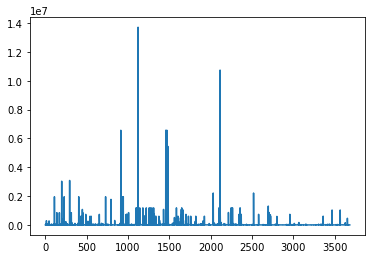

In [59]:
df_tweets['user_followers'].plot()

This will return a histogram of follower number.

### We are also interested in the means of users accessing social media.

In [60]:
df_tweets['source'].value_counts()

Twitter for iPhone                 1335
Twitter Web App                    1105
Twitter for Android                 810
TweetDeck                           214
Twitter for iPad                     99
Buffer                               32
Instagram                            22
Hootsuite Inc.                       16
Nonli                                 6
LinkedIn                              5
Microsoft Power Platform              5
SocialFlow                            5
24liveblog                            4
IFTTT                                 3
Twitter for Mac                       2
Falcon Social Media Management        2
Echobox                               2
GT_Backend                            2
Twitter Media Studio                  2
Sendible                              2
ThreadReaderApp                       1
Tweetbot for Mac                      1
EastMojo                              1
Publer                                1
TweetCaster for Android               1


This will give us the statistics of what method the users tweets. From the results, we can see iPhone users are the majority. Web app users and android users are slightly less than iPhone users, suggesting a possible bias of our data.

## Data Cleaning

### Cleaning unnessasery cloumns

In [61]:
df_tweets.drop(columns=['id','user_name','user_description','hashtags'], inplace=True)
df_tweets

,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites,is_retweet
0,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,Twitter for Android,0,0,False
1,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Twitter Web App,1,1,False
2,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Twitter for Android,0,0,False
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",Twitter Web App,446,2129,False
4,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,"Birmingham, England",2016-01-11 18:13:13,128,321,8635,False,2021-01-08 18:18:21,@birmingham_live Had our Pfizer jabs yesterday...,Twitter for iPhone,0,2,False
3679,NaN,2013-12-13 00:06:42,748,1293,6309,False,2021-01-08 18:15:52,I've had my #CovidVaccine thank you @nhsuhcw f...,Twitter for Android,1,20,False
3680,Kilkenny,2015-10-19 18:12:43,1357,1116,2006,False,2021-01-08 18:14:50,Great excitement and relief as our vaccinatio...,Twitter for Android,10,118,False
3681,Dakar-Valencia,2020-04-11 01:39:14,402,1265,5838,False,2021-01-08 18:05:58,#VOXcspppsoe75up84KKK\n#Orwell1984\n#RABIA2014...,Twitter for Android,0,0,False


Now we are only left with 12 column variables.